## 1. Ask

The task is to generate key insights which will help the sales team of Kmart to take some key business decisions towards Fine-tuning their sales strategy.

#### Business Problem Statements

1. What was the best month for sales? How much was earned that month?
2. Which city had the highest number of sales?
3. Recommend the most appropriate time to display advertising to maximize the likelihood of customers buying the products?
4. What products sold the most? Why do you think it sold the most?

## 2. Prepare

Downloaded the datasets from this [repository](https://disq.us/url?url=https%3A%2F%2Fgithub.com%2Fjsc1535%2FK-Mart-Data-Analysis%3AHMa-gm31GLGNSYFH0o0T4Stg2Mw&cuid=7064) to my local disk.

## 3. Process

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

As the data for each month is contained in separate files i loaded it then concated it to one dataframe.

In [2]:
#Loaded each dataset and added month column simultaneously
files = glob.glob('./K-Mart-Data-Analysis-datasets/*.csv')
df = pd.concat([pd.read_csv(fp).assign(month=os.path.basename(fp).split('_')[1]) for fp in files])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April
1,NaN,NaN,NaN,NaN,NaN,NaN,April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April


In [3]:
#Changed the column headers to snake case naming convention
df.rename(columns={"Order ID":"order_id","Product":"product","Quantity Ordered":"quantity_ordered","Price Each":"price_each","Order Date":"order_date","Purchase Address":"purchase_address"}, inplace=True)
df.head(1)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
 6   month             186850 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


The dataframe has 186850 rows but 545 rows are null and four columns are not is their right dtypes.

#### Data Cleaning

In [5]:
df[df['order_id'].isnull()]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
1,NaN,NaN,NaN,NaN,NaN,NaN,April
356,NaN,NaN,NaN,NaN,NaN,NaN,April
735,NaN,NaN,NaN,NaN,NaN,NaN,April
1433,NaN,NaN,NaN,NaN,NaN,NaN,April
1553,NaN,NaN,NaN,NaN,NaN,NaN,April
...,...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN,September
10274,NaN,NaN,NaN,NaN,NaN,NaN,September
10878,NaN,NaN,NaN,NaN,NaN,NaN,September
11384,NaN,NaN,NaN,NaN,NaN,NaN,September


All the 545 null rows are fully null. Therefore replacing the nulls with zero,mean,mode or median is not possible.

In [6]:
#We drop the null rows
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
 6   month             186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [7]:
#df['order_id'].astype("int")

The above code was raised an error when trying to convert the order_id column to integer. This points out presence of non numeric values. 

In [8]:
# Use Order ID column to fillter out the rows with text in every column
df = df[df['order_id'].str.isnumeric()].reset_index(drop= True).copy()
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April
...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September
185946,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September
185947,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September


In [9]:
#Convert the column to their right dtypes
df = df.astype({'order_id': 'int', 'quantity_ordered': 'int', 'price_each': 'float',})
df.dtypes

order_id              int32
product              object
quantity_ordered      int32
price_each          float64
order_date           object
purchase_address     object
month                object
dtype: object

## 4. Analyze

#### What was the best month for sales? How much was earned that month?

In [10]:
#Created total sales column
df['total_sales'] = df['quantity_ordered']*df['price_each']
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99


In [11]:
#Grouped the total sales by month
sort_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_sales = df.groupby(["month"])["total_sales"].sum().round(2).reset_index()
month_sales.index = pd.CategoricalIndex(month_sales["month"],categories=sort_order,ordered = True)
month_sales = month_sales.sort_index().reset_index(drop=True)

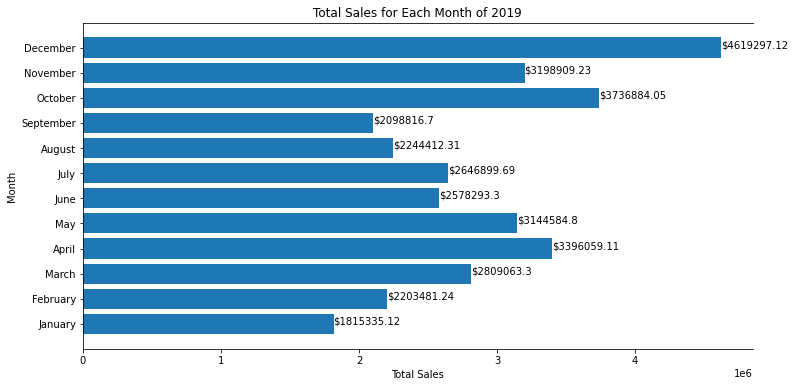

In [12]:
%matplotlib inline
fig= plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.barh(month_sales["month"],month_sales["total_sales"])
ax.set_ylabel("Month")
ax.set_xlabel("Total Sales")
ax.set_title("Total Sales for Each Month of 2019")
ax.spines['right'].set_visible(False)
for index, value in enumerate(list(month_sales["total_sales"])):
    ax.text(value, index, "$"+ str(value))
plt.show()

The best month for sales was December, with $4619297 as total sales.

#### Which city had the highest number of sales?

In [13]:
#Split purchase address to obtain and create a city column
df["city"] = df["purchase_address"].str.split(",").str[1]
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles


In [14]:
#Grouped total sales by city
city_sales= df[["city","total_sales"]].groupby(["city"]).sum().round(2).reset_index()
city_sales = city_sales.sort_values('total_sales',ascending=False)

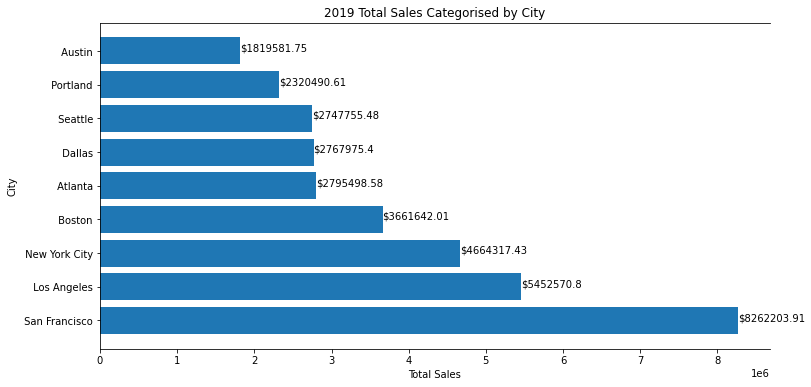

In [15]:
fig= plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.barh(city_sales["city"],city_sales["total_sales"])
ax.set_ylabel("City")
ax.set_xlabel("Total Sales")
ax.set_title("2019 Total Sales Categorised by City")
ax.spines['right'].set_visible(False)
for index, value in enumerate(list(city_sales["total_sales"])):
    ax.text(value, index, "$"+ str(value))
plt.show()

The city with the highest number of sales is San Francisco with $8262204 total sales.

#### Recommend the most appropriate time to display advertising to maximize the likelihood of customers buying the products?

In [16]:
#Sliced time from the order date column
df["order_date"] = df["order_date"].str.strip(' ')
df["time"] = df["order_date"].str[-5:-3]
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city,time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,Dallas,08
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston,22
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles,09


In [17]:
#Grouped total sales by time
time_sales = df[["time","total_sales"]].groupby(["time"]).sum().reset_index()

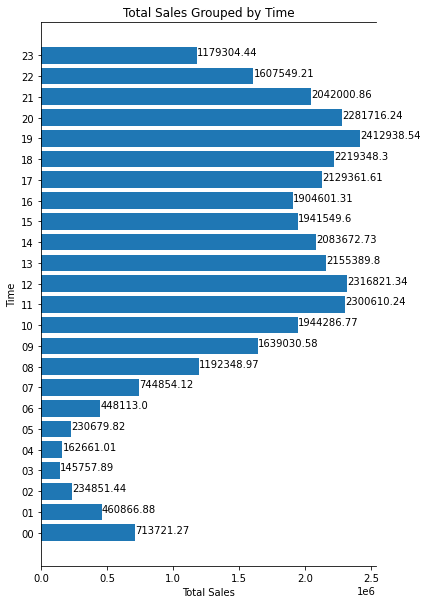

In [18]:
fig= plt.figure(figsize=(6,10))
ax = fig.add_subplot()
ax.barh(time_sales["time"],time_sales["total_sales"])
ax.set_ylabel("Time")
ax.set_xlabel("Total Sales")
ax.set_title("Total Sales Grouped by Time")
ax.spines['right'].set_visible(False)
for index, value in enumerate(list(time_sales["total_sales"])):
    ax.text(value, index, str(value))
plt.show()

Most sales were recorded during hours 1100-1259 and 1900-1959. Therefore product adverts displayed during those times are highly likely to record a higher advert influenced sales than those adverts displayed at other times of the day.

#### What products sold the most? Why do you think it sold the most?

In [19]:
#Grouped quantity ordered by product
ordered_product = df[["product","quantity_ordered"]].groupby(["product"]).sum().reset_index()
ordered_product = ordered_product.sort_values('quantity_ordered',ascending=False)

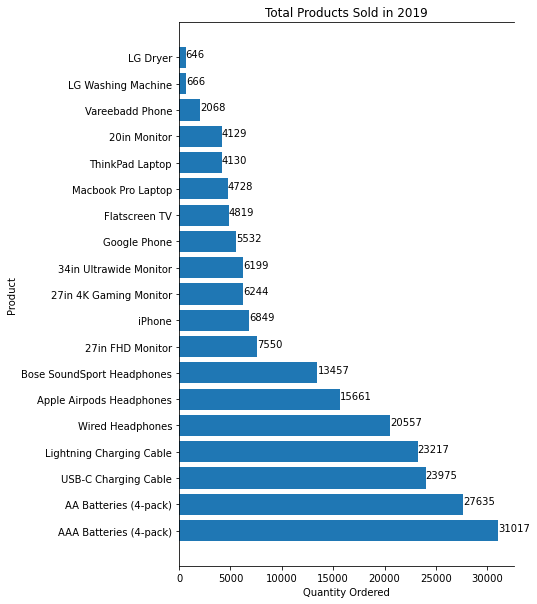

In [20]:
fig= plt.figure(figsize=(6,10))
ax = fig.add_subplot()
ax.barh(ordered_product["product"],ordered_product["quantity_ordered"])
ax.set_ylabel("Product")
ax.set_xlabel("Quantity Ordered")
ax.set_title("Total Products Sold in 2019")
ax.spines['right'].set_visible(False)
for index, value in enumerate(list(ordered_product["quantity_ordered"])):
    ax.text(value, index, str(value))
plt.show()

Wired Headphones, USB-C Charging Cable, Lightining Charging Cable,AAA Batteries (4-pack), AA Batteries (4-pack) were the most sold products in 2019, with each recording 20000+ in quantity ordered.
They sold the most because they are the cheapest products at K-mart.

In [21]:
df1 = df[["product","price_each","quantity_ordered"]].groupby(["product","price_each"]).sum().sort_values("price_each")
df1

,,quantity_ordered
product,price_each,
AAA Batteries (4-pack),2.99,31017
AA Batteries (4-pack),3.84,27635
USB-C Charging Cable,11.95,23975
Wired Headphones,11.99,20557
Lightning Charging Cable,14.95,23217
Bose SoundSport Headphones,99.99,13457
20in Monitor,109.99,4129
27in FHD Monitor,149.99,7550
Apple Airpods Headphones,150.00,15661


## 5. Share

## 6. Act